In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve, learning_curve

In [3]:
X, y = make_classification(n_samples=100000,
    n_features= 30,
    n_informative=10,
    flip_y=0.2 
)

In [4]:
clf = RandomForestClassifier()

train_scores, test_scores = validation_curve(
    clf, X, y,
    scoring="roc_auc",
    param_name="max_depth", 
    param_range=[1, 5, 10, 20, 35, 50],
    n_jobs=-1,
    cv=5,
)

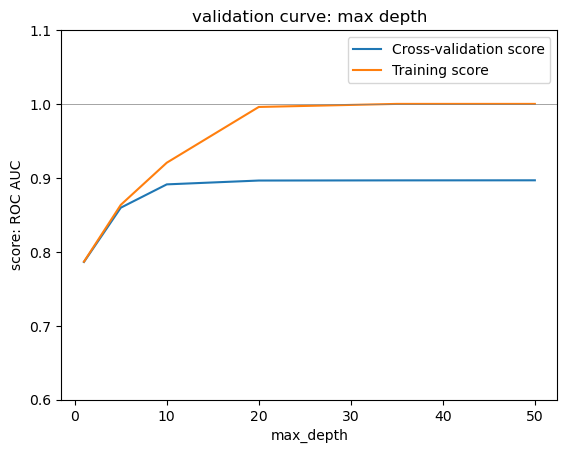

In [5]:
plt.plot([1, 5, 10, 20, 35, 50], test_scores.mean(axis=1), label="Cross-validation score")
plt.plot([1, 5, 10, 20, 35, 50], train_scores.mean(axis=1), label="Training score")
plt.title("validation curve: max depth")
plt.xlabel("max_depth")
plt.ylabel("score: ROC AUC")
plt.axhline(y=1, color='gray', linewidth=0.5)
plt.ylim(0.6, 1.1)
plt.legend()
plt.show()

In [6]:
clf_12 = RandomForestClassifier(max_depth=12)

In [7]:
train_sizes_12, train_scores_12, test_scores_12, fit_times_12, score_times_12 = learning_curve(
    clf_12, X, y, cv=10, n_jobs=-1, return_times=True
)

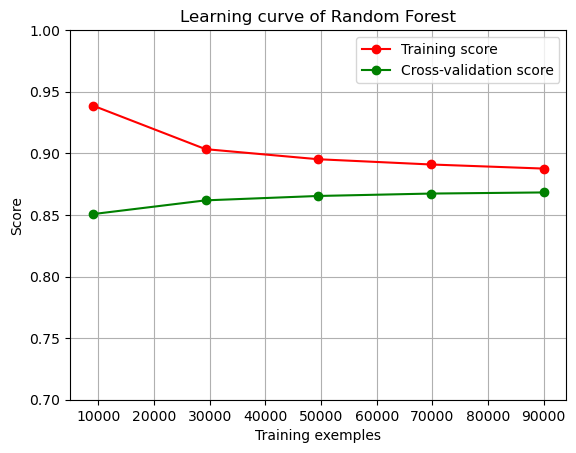

In [9]:
plt.plot(train_sizes_12, train_scores_12.mean(axis=1), 'o-', c="red", label="Training score")
plt.plot(train_sizes_12, test_scores_12.mean(axis=1), 'o-', c="green", label="Cross-validation score")
plt.grid(True)
plt.title("Learning curve of Random Forest")
plt.xlabel("Training exemples")
plt.ylabel("Score")
plt.ylim(0.7, 1)
plt.legend()
plt.show()

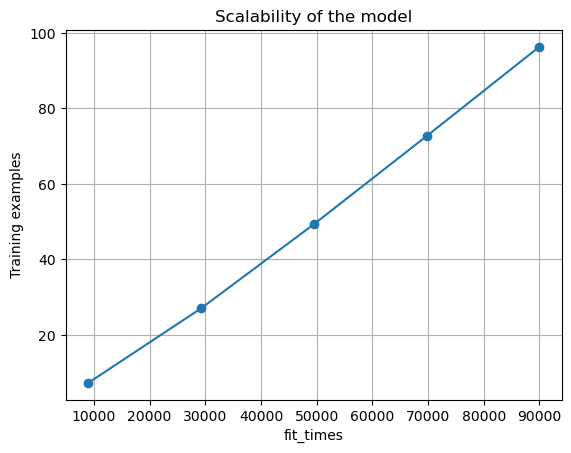

In [10]:
plt.plot(train_sizes_12, fit_times_12.mean(axis=1), '-o')
plt.grid(True)
plt.xlabel("fit_times")
plt.title("Scalability of the model")
plt.ylabel("Training examples")
plt.show()

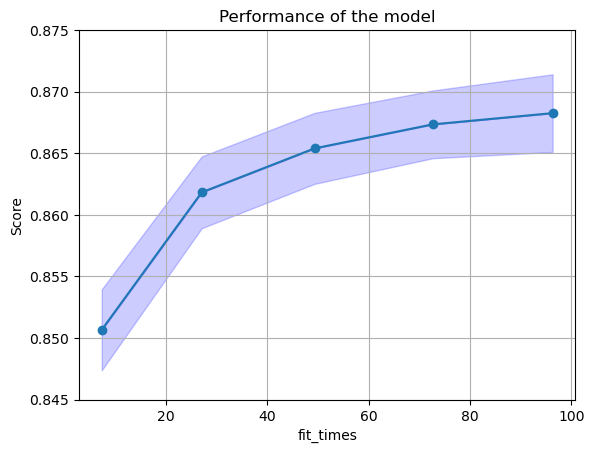

In [18]:
y_mean = test_scores_12.mean(axis=1)
y_std = test_scores_12.std(axis=1)
plt.plot(fit_times_12.mean(axis=1), y_mean, "-o")
plt.fill_between(fit_times_12.mean(axis=1), y_mean, y_mean + y_std, alpha=0.2, color="blue")
plt.fill_between(fit_times_12.mean(axis=1), y_mean, y_mean - y_std, alpha=0.2, color="blue")
plt.ylim(0.845, 0.875)
plt.grid(True)
plt.title("Performance of the model")
plt.xlabel("fit_times")
plt.ylabel("Score")
plt.show()